# GRIP Task-1 Prediction using Supervised ML

## Problem Statement
***Predict the percentage of an student based on the no. of study hours.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('student_score.csv')
print("data loaded succesfully")

data loaded succesfully


# DataSet visualization

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
print(df.sample())  # prints random sample 
print(df.sample(n=5))  # prints random sample data for 5 rows

    Hours  Scores
24    7.8      86
    Hours  Scores
4     3.5      30
3     8.5      75
19    7.4      69
22    3.8      35
15    8.9      95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
print("Null values in our dataset: ", df.isnull().sum().sum())

Null values in our dataset:  0


In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


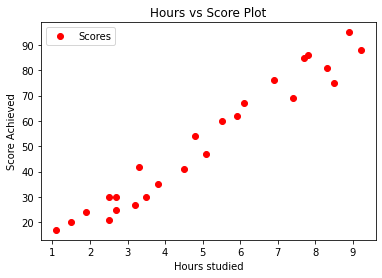

In [10]:
df.plot(x='Hours', y='Scores', style='or')
plt.title('Hours vs Score Plot')
plt.xlabel('Hours studied')
plt.ylabel('Score Achieved')
plt.show()

# Perfroming linear regression

In [12]:
x = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values  

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [20]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [21]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [48]:
print(x.shape)
print(y.shape)

(25, 1)
(25,)


*y= dependent variable*

*x=independent variable*

*Equation of linear regression*

*𝑦=𝑐+𝑚x*

*𝑦 is the Score*

*𝑐 is the intercept*

*𝑚 is the coefficient*



*The 𝑚 values are called the model coefficients or model parameters.*

In [22]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)   

In [27]:
print("shape of  x train set: ", x_train.shape)
print("shape of  x test set: ", x_test.shape)
print("shape of  y train set: ", y_train.shape)
print("shape of  y test set: ", y_test.shape)

shape of  x train set:  (20, 1)
shape of  x test set:  (5, 1)
shape of  y train set:  (20,)
shape of  y test set:  (5,)


In [28]:
from sklearn.linear_model import LinearRegression    
regressor = LinearRegression()    
regressor.fit(x_train, y_train)   

print("Training ... Completed !.")  

Training ... Completed !.


In [30]:
intercept =regressor.intercept_
coefficient = regressor.coef_

In [31]:
print("Intercept: ", intercept)
print("Coefficient: ", coefficient)

Intercept:  2.0181600414346974
Coefficient:  [9.91065648]


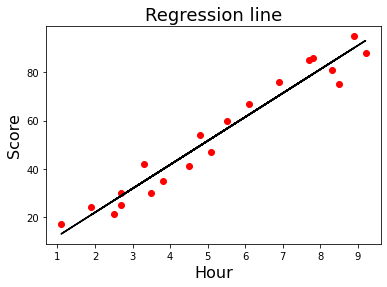

In [41]:
line = regressor.coef_*x_train+regressor.intercept_  
plt.scatter(x_train, y_train, color='red')  
plt.plot(x_train, line, color='black');  
plt.title("Regression line", fontsize=18)
plt.xlabel("Hour", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.show() 

In [43]:
print("Accuracy of Training learning rate -",regressor.score(x_train, y_train)*100)
print("Accuracy of Testing learning rate - ",regressor.score(x_test, y_test)*100)

Accuracy of Training learning rate - 95.15510725211553
Accuracy of Testing learning rate -  94.54906892105355


In [45]:
print(x_test)   
y_pred = regressor.predict(x_test)  
print("\n")
print("Prediction: ",y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Prediction:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df 

In [65]:
hours = [[9.5]]
own_pred = regressor.predict(hours)
print("Number of hours studied = {}".format(hours))  
print("Predicted Score = {}".format(own_pred[0]))  

Number of hours studied = [[9.5]]
Predicted Score = 96.16939660753592


# Conclusion

**From the above result we can say that if a student studied for 9.5 hours in a day then he will secure 96.16 MARKS**